In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [23]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

In [24]:
df = pd.read_csv("adult.csv", names=columns, header=None, skipinitialspace=True)

In [25]:
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

In [26]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

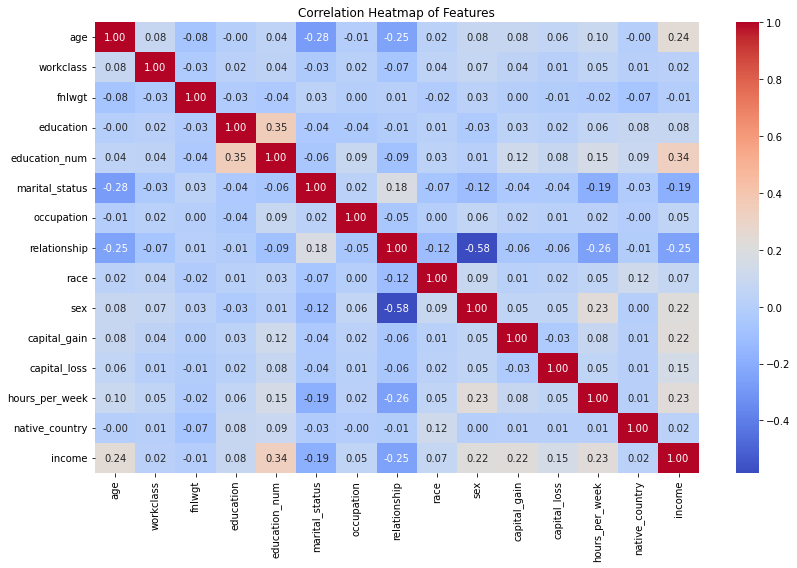

In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

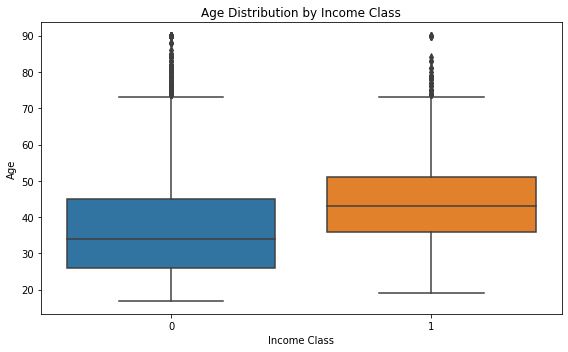

In [38]:
# Additional EDA visualizations using matplotlib and seaborn

# 1. Boxplot: Age distribution by income class
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

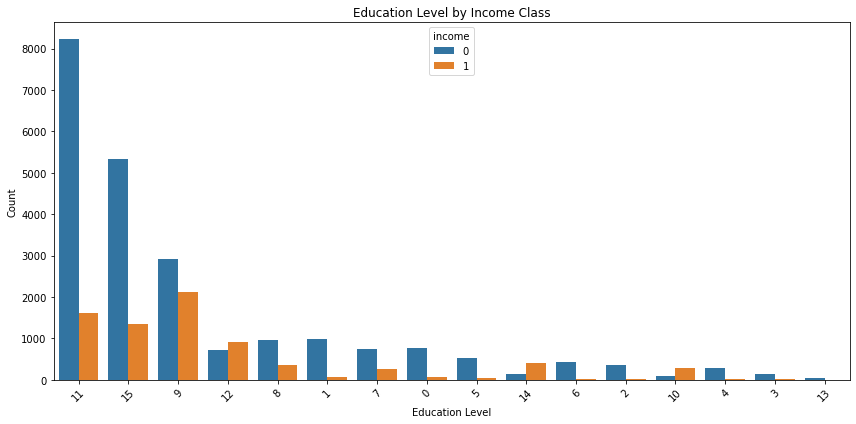

In [39]:
# 2. Countplot: Education levels by income
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=df, order=df['education'].value_counts().index)
plt.title('Education Level by Income Class')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

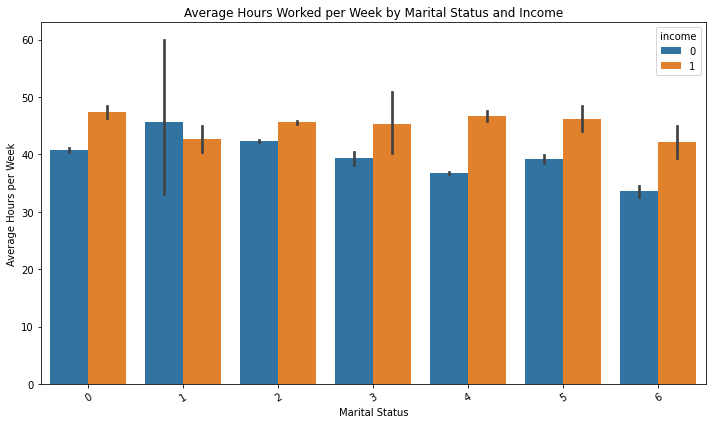

In [40]:
# # 3. Barplot: Average hours worked per week by marital status and income
plt.figure(figsize=(10, 6))
sns.barplot(x='marital_status', y='hours_per_week', hue='income', data=df)
plt.title('Average Hours Worked per Week by Marital Status and Income')
plt.xlabel('Marital Status')
plt.ylabel('Average Hours per Week')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

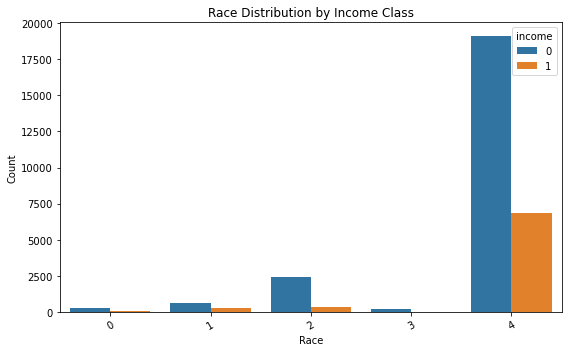

In [41]:
# 4. Countplot: Race distribution by income
plt.figure(figsize=(8, 5))
sns.countplot(x='race', hue='income', data=df)
plt.title('Race Distribution by Income Class')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

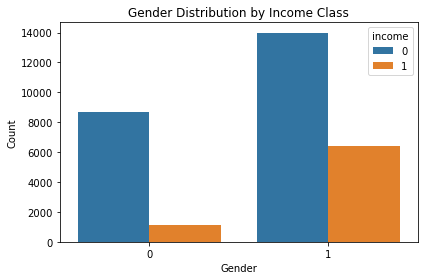

In [42]:
# 5. Countplot: Gender distribution by income
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='income', data=df)
plt.title('Gender Distribution by Income Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [27]:
# Split features and target
X = df.drop("income", axis=1)
y = df["income"]

In [28]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

In [30]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [31]:
# Metrics for both models
metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    "Recall": [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    "F1 Score": [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)],
    "ROC AUC": [roc_auc_score(y_test, y_proba_lr), roc_auc_score(y_test, y_proba_rf)]
})

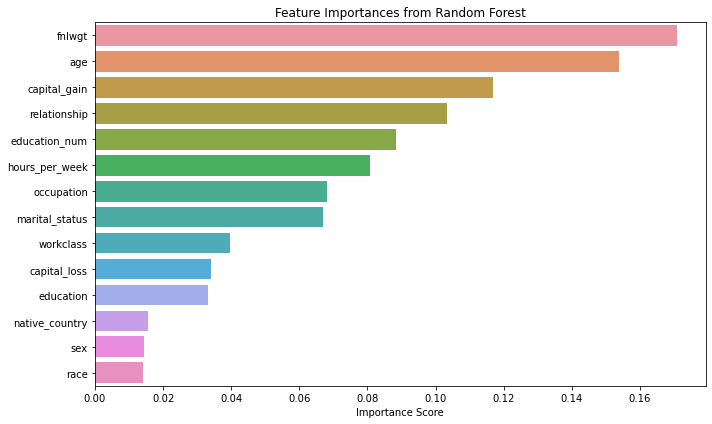

In [33]:
# Feature importances from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
# importance_plot_path = "/mnt/data/feature_importance_rf.png"
# plt.savefig(importance_plot_path)
plt.show()

In [34]:
# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

<function matplotlib.pyplot.show(close=None, block=None)>

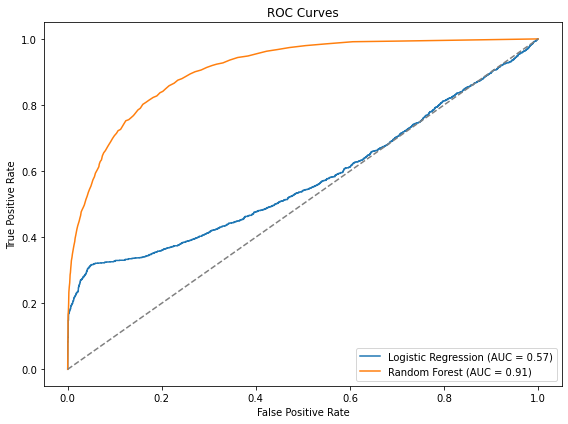

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_lr)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_rf)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
# roc_plot_path = "/mnt/data/roc_curves.png"
# plt.savefig(roc_plot_path)
plt.show